In [1]:
from networks import get_network, get_network_stats, plot_grid_network, get_city_network, plot_city_network, get_fractal_from_network
from dla_model_final import plot_grid, DLA_init, get_fractal_dla
from fractal_city import network_frac_dim
from animate_grid import create_gif

This notebook holds examples of how to use functions for generating urban-like structures with DLA. Created for course *Complex System Simulation* at the University of Amsterdam, 2021. **Full explanation of the functions can be found in relevant module .py files.**

# 1. Getting a DLA grid and visualising it

DLA algorithm:
- Start with a completely empty space (numpy array) and place one particle in it. 
- Spawn a random walker which will walk through the space until it hits the structure, once that happens it has a probability of Ps of adhering.
- Third particle is released and the process repeats until a stopping condition is met.

Notable implementation choices made:
- Square Lattice DLA is used.
- Discretises the space domain.
- Walkers are bounded in a radius around the aggregate, so walkers can not walk off into the distance (yields significant speedup).


## 1.1 Static stickiness

Code below runs a DLA simulation on a 100x100 grid, 400 walkers and 0.1 stickiness, visualises it.

In [4]:
dla_static_grid = DLA_init(100,400, 1)

100%|██████████| 400/400 [00:17<00:00, 22.24it/s]


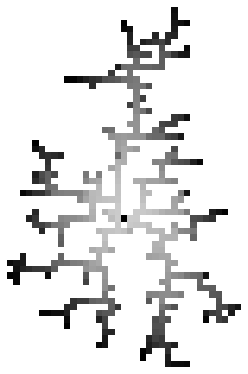

In [5]:
plot_grid(dla_static_grid)

### 1.1.1 Generating a gif visualisation

Code below creates a gif of the above created DLA structure and saves it into "figures/gifs/animation-static-stickiness.gif".

MovieWriter PillowWriter unavailable; using Pillow instead.


Done!


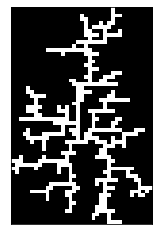

In [6]:
create_gif(grid = dla_static_grid, from_file = False, file_name = "animation-static-stickiness")

## 1.2 Dynamic stickiness

Code below generates a DLA grid with step function dynamic stickiness, 500x500 grid and 5000 walkers. **Can take around 8 minutes!** A high number of walkers is needed to clearly see the dynamic properties of the stickiness. Other dynamic stickness functions available: 'sin', 'exponential', 'linear', 'dampened_sin' and 'waves'.

In [7]:
dla_dynamic_grid = DLA_init(500, 5000, dynamic_scaler = "step_function")

100%|██████████| 5000/5000 [07:00<00:00, 11.90it/s]


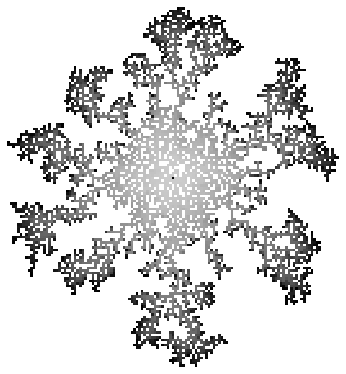

In [8]:
plot_grid(dla_dynamic_grid)

MovieWriter PillowWriter unavailable; using Pillow instead.


Done!


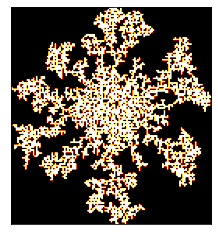

In [9]:
# create gif
create_gif(grid = dla_dynamic_grid, from_file = False, file_name = "animation-dynamic-stickiness")

# 2. Network analysis

## 2.1 From a DLA grids

Code below converts a DLA grid to a network, visualises it and generates selected statistics.

Conversion to network works a follows:
- Every occupied cell is turned into a node
- Every neighbor that the cell has to the east, west, north and south creates a link
- To make sure that the nodes only represent junctions and dead-ends, nodes of degree = 2 are removed but the links are preserved

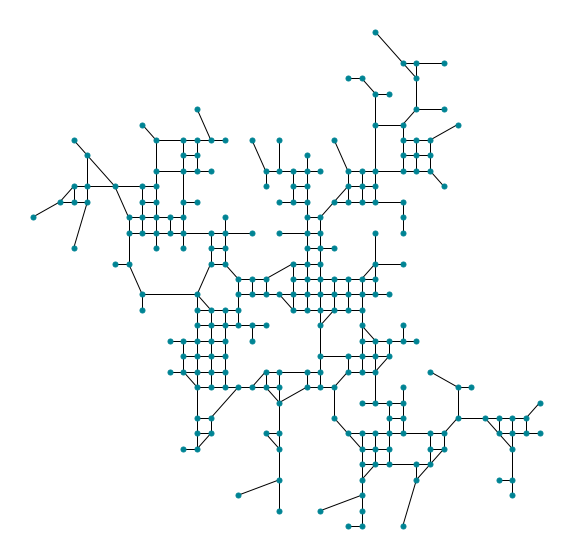

In [11]:
G = get_network(dla_static_grid)
plot_grid_network(G)

In [12]:
get_network_stats(G)

,average_degree,average_clustering,transitivity,entropy,dead_ends,ways_4,nodes
0,2.766917,0.065163,0.080666,1.259524,0.203008,0.199248,266


## 2.2 Real-world city networks

Code below retrieves Berlin, Germany city network with OSMnx package, visualises it and returns selected statistics.

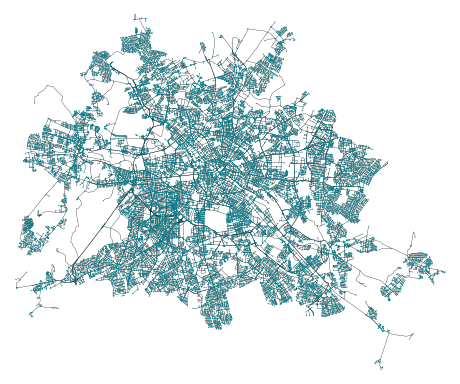

In [43]:
G, G_plotting = get_city_network("Berlin, Germany", get_multi = True)
plot_city_network(G_plotting)

In [44]:
get_network_stats(G, osmnx = True)

,average_degree,average_clustering,transitivity,entropy,dead_ends,ways_4,nodes
0,2.99864,0.052396,0.058512,3.571841,0.119389,0.256605,27934


# 3. Fractal analysis

## 3.1 Converting a real-world network to a fractal

The code below converts Berlin, Germany network to a binary numpy array by binning the nodes (based on their latitude and longitude) and visualises it.

In [45]:
fractal = get_fractal_from_network(G, bins = 200)

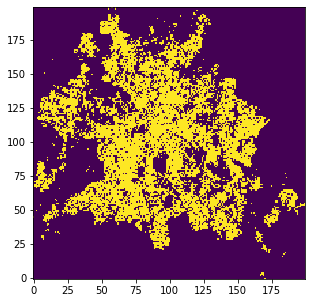

In [46]:
plt.figure(figsize = (5,5))
plt.imshow(fractal, interpolation='nearest', origin='lower')

## 3.2 Calculating fractal dimension of a real-life city

Code below retrieves a real world network (Berlin) converts it into a fractal (as explained in 3.1) and calculates its' fractal dimension.

In [2]:
network_frac_dim(city = "Berlin", country = "Germany")

Found fractal dimension of 1.8447025138565047 with standard deviation 0.009836886221191754.


## 3.3 Calculating fractal dimension from a numpy array

Code below takes a DLA numpy array can calculates its' fracta dimension.

In [6]:
fd, std = get_fractal_dla(dla_static_grid)

Found fractal dimension of 1.615351769663527 with standard deviation 0.06624163503618091.
